## Future Knowledge abaout Perlin Noise
https://www.redblobgames.com/maps/terrain-from-noise/#implementation

In [1]:
import noise
import numpy as np
from matplotlib import pyplot as plt

def show(image, title="None"):
    plt.imshow(image)
    plt.title(title)
    plt.colorbar()
    plt.show()

In [2]:
shape = (1024,1024)
scale = 100
octaves = 6
persistence = 0.5
lacunarity = 2.0
seed = np.random.randint(0,100)

world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=1024, 
                                    repeaty=1024, 
                                    base=seed)

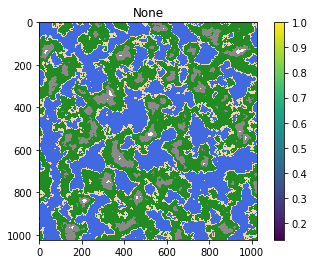

In [3]:
blue = [65,105,225]
green = [34,139,34]
beach = [238, 214, 175]
snow = [255, 250, 250]
mountain = [139, 137, 137]

def add_color(world):
    color_world = np.zeros(world.shape+(3,))
    for i in range(shape[0]):
        for j in range(shape[1]):
            if world[i][j] < -0.05:
                color_world[i][j] = blue
            elif world[i][j] < 0:
                color_world[i][j] = beach
            elif world[i][j] < .20:
                color_world[i][j] = green
            elif world[i][j] < 0.35:
                color_world[i][j] = mountain
            elif world[i][j] < 1.0:
                color_world[i][j] = snow

    return color_world

color_world = add_color(world)
show(color_world / 255)

In [4]:
a,b = shape[0]/2, shape[1]/2
n = 1024
r = 125
y,x = np.ogrid[-a:n-a, -b:n-b]
# creates a mask with True False values
# at indices
mask = x**2+y**2 <= r**2

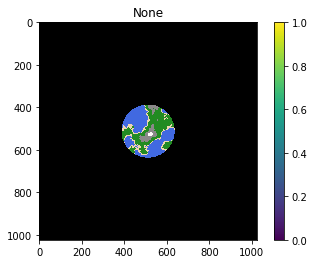

In [5]:
black = [0, 0, 0]
island_world = np.zeros_like(color_world)

for i in range(shape[0]):
    for j in range(shape[1]):
        if mask[i][j]:
            island_world[i][j] = color_world[i][j]
        else:
            island_world[i][j] = black

show(island_world / 255)

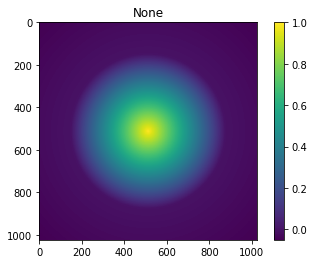

In [6]:
import math

center_x, center_y = shape[1] // 2, shape[0] // 2
circle_grad = np.zeros_like(world)

for y in range(world.shape[0]):
    for x in range(world.shape[1]):
        distx = abs(x - center_x)
        disty = abs(y - center_y)
        dist = math.sqrt(distx*distx + disty*disty)
        circle_grad[y][x] = dist

# get it between -1 and 1
max_grad = np.max(circle_grad)
circle_grad = circle_grad / max_grad
circle_grad -= 0.5
circle_grad *= 2.0
circle_grad = -circle_grad

# shrink gradient
for y in range(world.shape[0]):
    for x in range(world.shape[1]):
        if circle_grad[y][x] > 0:
            circle_grad[y][x] *= 20

# get it between 0 and 1
max_grad = np.max(circle_grad)
circle_grad = circle_grad / max_grad
show(circle_grad)

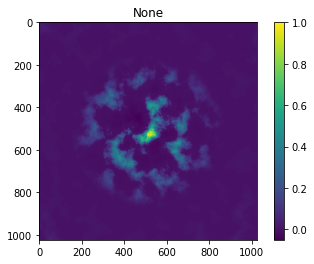

In [7]:
world_noise = np.zeros_like(world)

for i in range(shape[0]):
    for j in range(shape[1]):
        world_noise[i][j] = (world[i][j] * circle_grad[i][j])
        if world_noise[i][j] > 0:
            world_noise[i][j] *= 20

# get it between 0 and 1
max_grad = np.max(world_noise)
world_noise = world_noise / max_grad

show(world_noise)

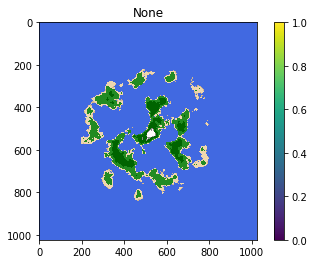

In [10]:
lightblue = [0,191,255]
blue = [65,105,225]
green = [34,139,34]
darkgreen = [0,100,0]
sandy = [210,180,140]
beach = [238, 214, 175]
snow = [255, 250, 250]
mountain = [139, 137, 137]

threshold = 0.02

def add_color2(world):
    color_world = np.zeros(world.shape+(3,))
    for i in range(shape[0]):
        for j in range(shape[1]):
            if world[i][j] < threshold + 0.05:
                color_world[i][j] = blue
            elif world[i][j] < threshold + 0.055:
                color_world[i][j] = sandy
            elif world[i][j] < threshold + 0.1:
                color_world[i][j] = beach
            elif world[i][j] < threshold + 0.25:
                color_world[i][j] = green
            elif world[i][j] < threshold + 0.6:
                color_world[i][j] = darkgreen
            elif world[i][j] < threshold + 0.7:
                color_world[i][j] = mountain
            elif world[i][j] < threshold + 1.0:
                color_world[i][j] = snow

    return color_world

island_world_grad = add_color2(world_noise)
show(island_world_grad / 255)